## Classical harmonically interacting chain - Isobaric ensemble

The hamiltonian is given by 

$$H = \sum_{i=1}^{N} \frac{p^2}{2m} + \sum_{i=1}^{N-1} \frac{k}{2} (x_{i+1} - x_i - a)^2$$

<center><img src="ch.png" width=400pt/></center>

In the isobaric ensemble, NPT are given, so that $\mu$VE are unknown. 

The partition function is given by 

$$ Z_G(\beta,P) = \int dV Z_N(\beta,V) e^{-\beta PV} $$

where $Z_N$ is the partition function for the N particles in the canonical ensemble. 

As our system is one-dimensional, $dV = d\ell \delta(A)$ where $\ell$ is the ststem's length (distance bewtween the first and the last particle of the chain). Then, the partition function is 

$$\boxed{Z_G(\beta,F) = \int d\ell Z_N(\beta,\ell) e^{-\beta F \ell}}$$

We must integrate over all possible lengths of the system, so we have a constraint given by 

$$\delta \left( \ell - \sum_{i=1}^{N-1} (x_{i+1} - x_i) \right)$$

Besides, the total length cannot be larger than the reservoir's length 

$$\Theta(L-\ell)$$

where $L$ is the reservoir's length. Notice that the results cannot depend on $L$ 

It follows that, 

$$ Z_G(\beta,F) = \frac{1}{h^N} \int d\ell e^{-\beta F \ell} \left( \int \prod_{i=1}^{N} dx_i dp_i e^{-\beta H} \right) \delta \left( \ell - \sum_{i=1}^{N-1} (x_{i+1} - x_i) \right) \Theta(L-\ell)$$

Integrating in momentum

$$Z_G(\beta,F) = \lambda^{-N} \int \prod_{i=1}^{N} dx_i \exp\left\{-\beta F \sum_{i=1}^{N-1} (x_{i+1} - x_i) - \beta \sum_{i=1}^{N-1} \frac{k}{2} (x_{i+1} - x_i - a)^2\right\}  \Theta(L-\ell)$$

where $\lambda = h \sqrt{\frac{\beta}{2\pi m}}$ is the DeBroglie thermal wavelength 

Let $u_i = x_{i+1} - x_i$. In the thermodynamic limit, 

$$Z_G(\beta,F) = \lambda^{-N} \int \prod_{i=1}^{N} du_i \exp\left\{-\beta F \sum_{i=1}^{N} u_{i} - \beta \sum_{i=1}^{N} \frac{k}{2} (u_i - a)^2\right\}  \Theta(L-\ell)$$

For large enough $L$ 

$$Z_G(\beta,F) = \lambda^{-N} \int_0^\infty \prod_{i=1}^{N} du_i \exp\left\{-\beta F \sum_{i=1}^{N} u_{i} - \beta \sum_{i=1}^{N} \frac{k}{2} (u_i - a)^2\right\} $$

$$\boxed{Z_G(\beta,F) = \lambda^{-N} \left( \int_0^\infty du \exp\left\{-\beta F u - \frac{\beta k}{2} (u - a)^2\right\}  \right)^N }$$

Finally, 

$$\boxed{Z_G(\beta,F) = \lambda^{-N} \left( \mathcal{L} \left\{ e^{\frac{\beta k}{2} (u - a)^2} \right\} (\beta F)  \right)^N }$$

where $\mathcal{L}$ is the Laplace's transform. 

In [144]:
import numpy as np
from scipy.integrate import quad
import matplotlib.pyplot as plt
plt.style.use('dark_background')
plt.rcParams["figure.figsize"] = (10,8)
plt.rcParams.update({'font.size': 15})

In [187]:
# Parameters
h = 1
m = 10
k = 10
a = 0.01
N = 100

Let's analyze the case of energy 

$$G(\beta,F) = -  \frac{1}{\beta} \log Z_G $$

The Gibbs free energy is by definition 

$$G = H - TS = U + F\ell - TS $$

$$dG = \ell dF - SdT$$

Then, 

$$\left( \frac{\partial G}{\partial F} \right)_T = \ell \qquad \left( \frac{\partial G}{\partial T} \right)_F = - S$$

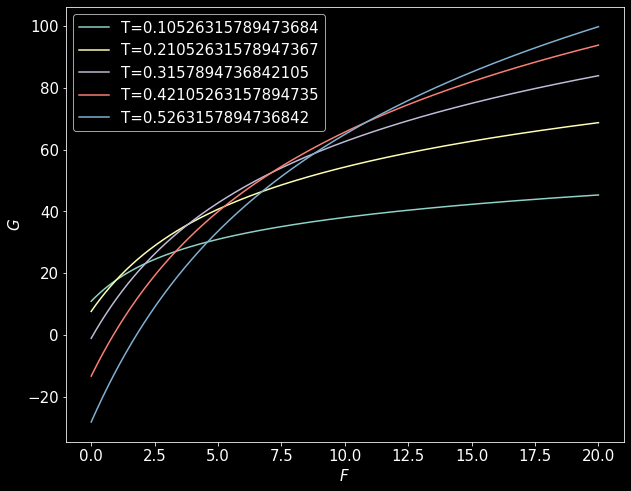

In [249]:
# Temperature 
T = np.linspace(0,2,20)[1:6]
# Inverse temperature
β = 1/T
β_size = len(β)

# Log of partition function
LnZ = np.zeros(1000)
# Force 
F = np.linspace(0,20,1000)
# Gibbs Free energy
G = np.zeros(1000)


fig = plt.figure()

for i in range(β_size): # Iterate over temperatures
    λ = h/np.sqrt(2*np.pi*m/β[i]) # Thermal wavelength
    for j in range(1000): # Iterate over forces
        f = lambda x: np.exp(-β[i]*F[j]*x-β[i]*(k/2)*(x-a)**2) # argument of the Laplace's transform
        LnZ[j] = N * np.log(quad(f,0,np.inf)[0] / λ) # Log of the partition function -> N*log(L(f)/λ)
    G = -(1/β[i])*LnZ # Gibbs free energy
    plt.plot(F,G) 

plt.xlabel('$F$')
plt.ylabel('$G$')
plt.legend(["T="+str(T[i]) for i in range(len(T))])
plt.savefig('test2.png', bbox_inches='tight',transparent=True)

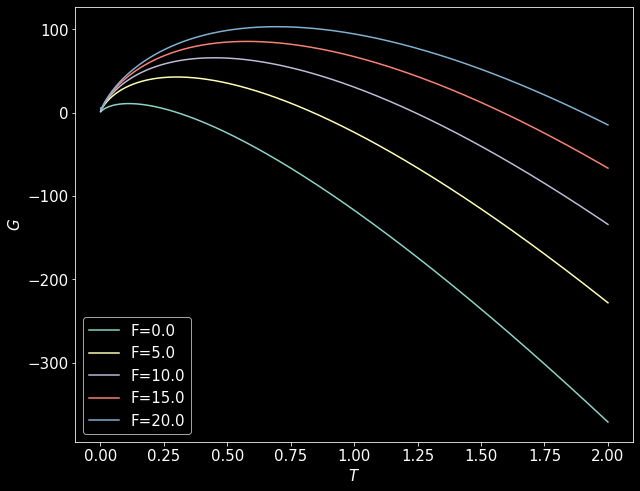

In [239]:
# Force
F = np.linspace(0,20,5)

# Temperature
T = np.linspace(0,2,1000)[1:]
# Inverse temperature
β = 1/T
β_size = len(β)
# Log of partition function
LnZ = np.zeros(β_size)
# Length
G = np.zeros(β_size)


fig = plt.figure()

for j in range(5): # Iterate over temperatures
    for i in range(β_size): # Iterate over forces
        λ = h/np.sqrt(2*np.pi*m/β[i]) # Thermal wavelength
        f = lambda x: np.exp(-β[i]*F[j]*x-β[i]*(k/2)*(x-a)**2) # argument of the Laplace's transform
        LnZ[i] = N * np.log(quad(f,0,np.inf)[0] / λ) # Log of the partition function -> N*log(L(f)/λ)
        G[i] = -(1/β[i])*LnZ[i] # Gibbs free energy
    plt.plot(T,G) 

plt.xlabel('$T$')
plt.ylabel('$G$')
plt.legend(["F="+str(F[i]) for i in range(len(F))])
plt.savefig('test3.png', bbox_inches='tight',transparent=True)

The average length is given by 

$$\langle \ell \rangle = - \frac{1}{\beta} \frac{\partial \log Z_G}{\partial F}$$

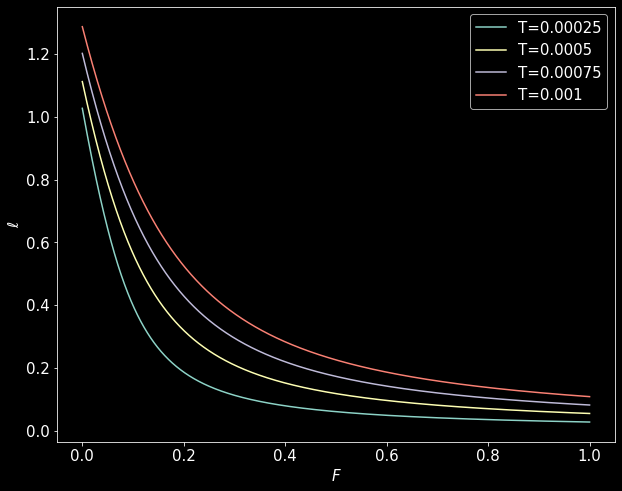

In [209]:
# Temperature 
T = np.linspace(0,0.001,5)[1:]
# Inverse temperature
β = 1/T
β_size = len(β)

# Log of partition function
LnZ = np.zeros(10000)
# Force 
F = np.linspace(0,1,10000)
# Length
l = np.zeros(10000)

# List to store the length when F=0 i.e. natural length at some temperature T
Zerolength = []

fig = plt.figure()

for i in range(β_size): # Iterate over temperatures
    λ = h/np.sqrt(2*np.pi*m/β[i]) # Thermal wavelength
    for j in range(10000): # Iterate over forces
        f = lambda x: np.exp(-β[i]*F[j]*x-β[i]*(k/2)*(x-a)**2) # argument of the Laplace's transform
        LnZ[j] = N * np.log(quad(f,0,np.inf)[0] / λ) # Log of the partition function -> N*log(L(f)/λ)
    l = -(1/β[i])*(np.diff(LnZ)/np.diff(F)) # avg length
    Zerolength.append(l[0]) # zero-force lengths
    plt.plot(F[:-1],l) 

plt.xlabel('$F$')
plt.ylabel('$\ell$')
plt.legend(["T="+str(T[i]) for i in range(len(T))])
plt.savefig('test.png', bbox_inches='tight',transparent=True)

In [189]:
Zerolength[0]

1.0271807225470955

Notice that at $T=0$ the length is approximately $(N+1)a = 1.01$
